<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Projeto 3</font>
### <font color='blue'>Aplicação Prática de Autovetores e Autovalores com PCA (Análise de Componentes Principais)</font>

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [2]:
# Imports
import numpy as np
import pandas as pd

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



#### Por Que Precisamos Reduzir a Dimensionalidade dos Dados?

Normalmente, os dados contêm dezenas, centenas ou mesmo milhares de recursos (atributos). Ou seja, os dados podem ter alta dimensionalidade. 

Trabalhar diretamente com dados de alta dimensionalidade apresenta algumas dificuldades: é difícil analisar, a interpretação é difícil, a visualização é quase impossível e (do ponto de vista prático) o armazenamento dos vetores de dados pode ser custoso computacionalmente. 

Dados de alta dimensionalidade são muitas vezes incompletos, ou seja, muitas dimensões são redundantes e podem ser explicadas por uma combinação de outras dimensões. 

Reduzimos a dimensionalidade dos dados para diminuir a complexidade dos dados. Quanto menos recursos, menor é a complexidade, e mais fácil para analisar, visualizar e compreender os dados.

Redução de dimensionalidade nos permite trabalhar com uma representação mais compacta dos dados, idealmente sem perder informações. Nós podemos pensar redução da dimensionalidade como técnica de compressão, semelhante ao jpeg ou mp3, que são algoritmos de compactação para imagens e música, respectivamente.

#### Definindo PCA - Principal Component Analysis

A análise de componentes principais (PCA) é uma técnica usada para enfatizar a variação e detectar padrões fortes em um conjunto de dados. Nós a usamos para entender melhor os dados.

Nas tarefas de análise de dados do mundo real, analisamos dados complexos, ou seja, dados multidimensionais. Plotamos os dados e encontramos vários padrões ou os usamos para treinar modelos de aprendizado de máquina. 

À medida que as dimensões dos dados aumentam, também aumenta a dificuldade de visualizá-los e executar cálculos. Ao reduzir as dimensões dos dados removemos dimensões redundantes e mantemos apenas as dimensões mais importantes.

PCA é a principal técnica de redução de dimensionalidade, sendo normalmente classificado como algoritmo de aprendizagem não supervisionado.

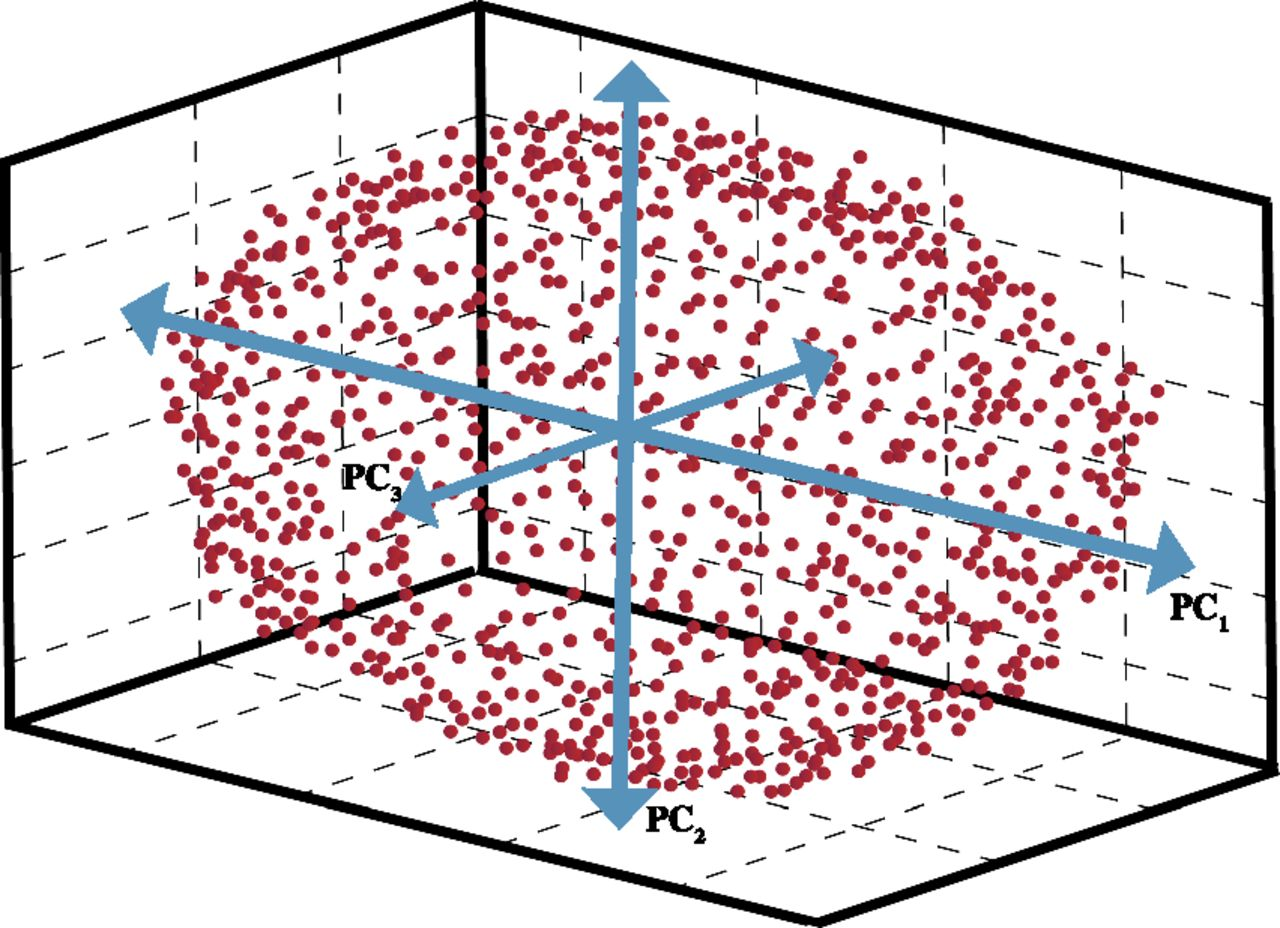

In [4]:
from IPython.display import Image
Image('imagens/pca0.jpg', width=600, height=500)

#### Quando Devo Usar PCA?

Para decidir se deve usar ou não o PCA, você deve responder "sim" para as 5 perguntas abaixo:

* 1- Você tem um dataset de alta dimensionalidade?
* 2- Deseja reduzir o número de variáveis, mas não consegue identificar variáveis para remover completamente?
* 3- Deseja garantir que suas variáveis sejam independentes umas das outras?
* 4- Você se sente à vontade para tornar suas variáveis independentes um pouco menos interpretáveis?
* 5- Está disposto a perder uma parte da informação (variação) contida nos dados?

Se você respondeu "sim" às 5 perguntas, o PCA é uma boa alternativa. 

#### Como o PCA Funciona?

O PCA se baseia nos conceitos de Matriz de Variância e Covariância.

* Variância: É uma medida da variabilidade dos dados, ou seja, simplesmente mede como os dados estão espalhados. Matematicamente é o desvio quadrado médio da pontuação média. Usamos a fórmula abaixo para calcular a variância var(x).

* Covariância: É uma medida da extensão em que os elementos correspondentes de dois conjuntos de dados ordenados se movem na mesma direção. A fórmula é mostrada abaixo, indicada por cov(x, y) como a covariância de x e y. Onde, xi é o valor de x na i-ésima dimensão.

x bar e y bar indicam os valores médios correspondentes.

Uma maneira de definir a covariância é como dois conjuntos de dados estão inter-relacionados.

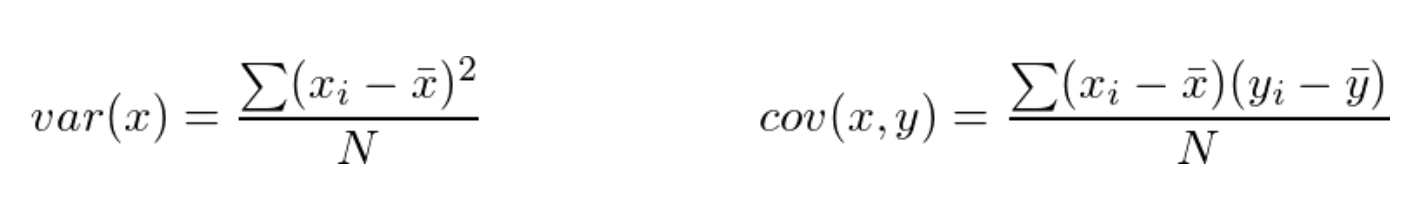

In [5]:
from IPython.display import Image
Image('imagens/pca1.png')

No algoritmo PCA, precisamos calcular uma matriz que resume como todas as nossas variáveis se relacionam.

Em seguida, dividimos essa matriz em dois componentes separados: direção e magnitude. Podemos então entender as “direções” de nossos dados e sua “magnitude” (ou quão “importante” cada direção é). 

A imagem abaixo (extraída do site setosa.io) exibe as duas direções principais nesses dados: a “direção vermelha” e a “direção verde”. 

Nesse caso, a “direção vermelha” é a mais importante (indica como as duas variáveis variam juntas). Na forma como os pontos estão organizados você pode ver que a “direção vermelha” parece mais importante do que a “direção verde”.

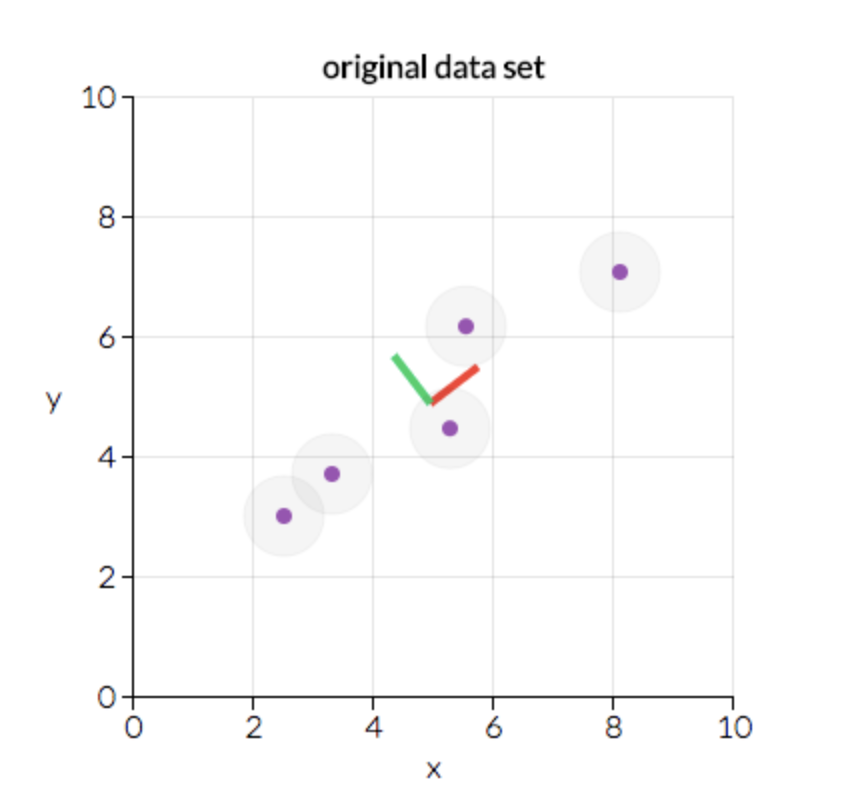

In [6]:
from IPython.display import Image
Image('imagens/pca2.png', width=400, height=300)

Transformaremos nossos dados originais para alinharmos com essas direções importantes (que são combinações de nossas variáveis originais). A imagem abaixo (novamente de setosa.io) tem os mesmos dados exatos que acima, mas com a transformação para que os eixos x e y agora sejam a “direção vermelha” e a “direção verde”. 

Qual seria a linha de melhor ajuste aqui?

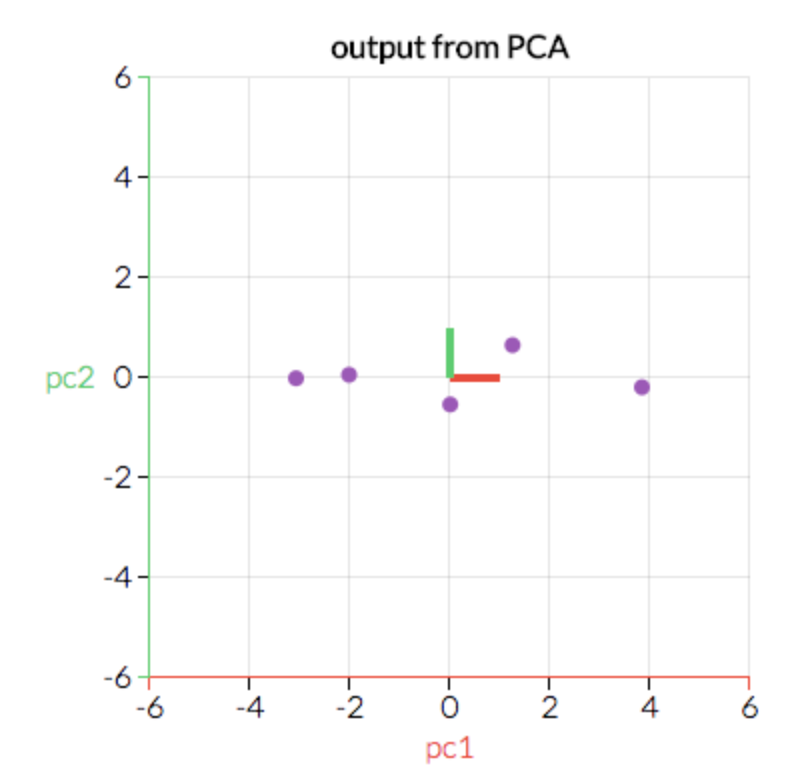

In [7]:
from IPython.display import Image
Image('imagens/pca3.png', width=400, height=300)

Enquanto o exemplo visual aqui é bidimensional (e, portanto, temos duas "direções"), pense em um caso em que nossos dados tenham mais dimensões. Ao identificar quais “direções” são mais “importantes”, podemos compactar ou projetar nossos dados em um espaço menor, descartando as “direções” que são as “menos importantes”. Ao projetar nossos dados em um espaço menor, reduzimos a dimensionalidade do nosso espaço de recursos.

A questão agora está em como calcular essas direções e encontrar as mais relevantes. Isso é o que faz o algoritmo PCA.

#### Descrição do Algoritmo PCA

Abaixo temos a descrição do algoritmo PCA (links de referência estão ao final do capítulo). Antes de iniciar, você deve considerar dados tabulares organizados com linhas e colunas.

O algoritmo que será descrito é basicamente o que acontece quando você executa estas 3 linhas de código em Python:

In [8]:
# Aplicando PCA
# from sklearn.decomposition import PCA
# pca = PCA()
# X_pca = pca.fit_transform(X)

1. Seus dados de entrada devem estar divididos em uma ou mais colunas de entrada (representado por X) e uma ou mais colunas de saída (representado por Y). Aplicamos o PCA em X. Se os seus dados tiverem a variável de saída Y, ela não entra no cálculo do PCA. Nesse caso você reduziria a dimensionalidade de X para então tentar prever Y. PCA trabalha no X.

****

2. Pegue a matriz de variáveis independentes X e, para cada coluna, subtraia a média dessa coluna de cada entrada (Isso garante que cada coluna tenha uma média de zero).

****

3. Decida se deve ou não padronizar. Dadas as colunas de X, os recursos com variação mais alta são mais importantes do que os recursos com variação menor ou a importância dos recursos é independente da variação? (Nesse caso, importância significa quão bem esse recurso prevê Y). Se a importância dos recursos for independente da variação dos recursos, divida cada observação em uma coluna pelo desvio padrão dessa coluna (Isso, combinado com a etapa 2, padroniza cada coluna de X para garantir que cada coluna tenha média zero e desvio padrão 1). Chame a matriz centralizada (e possivelmente padronizada) Z. PCA espera receber os dados padronizados.

****

4. Pegue a matriz Z, transponha-a e multiplique a matriz transposta por Z (Escrevendo isso matematicamente, teríamos ZᵀZ.) A matriz resultante é a matriz de covariância de Z.

****

5. (Este é provavelmente o passo mais difícil a seguir - continue aqui comigo) Calcule os autovetores e seus autovalores correspondentes de Z. A composição automática de ZᵀZ é onde decompomos ZᵀZ em PDP⁻¹, onde P é a matriz de autovetores e D é a matriz diagonal com autovalores na diagonal e valores de zero em qualquer outro lugar. Os autovalores na diagonal de D serão associados à coluna correspondente em P - ou seja, o primeiro elemento de D é λ₁ e o autovetor correspondente é a primeira coluna de P. Isso vale para todos os elementos em D e seus autovetores correspondentes em P. Sempre poderemos calcular o PDP⁻¹ dessa maneira. 

****

6. Pegue os autovalores λ₁, λ₂,…, λn e classifique-os do maior para o menor. Ao fazer isso, classifique os autovetores em P de acordo (Por exemplo, se λ₂ é o maior autovalor, pegue a segunda coluna de P e coloque-a na posição da primeira coluna). Dependendo do pacote de computação, isso pode ser feito automaticamente. Chame essa matriz classificada de autovetores P* (As colunas de P* devem ser as mesmas que as de P, mas talvez em uma ordem diferente). Observe que esses autovetores são independentes um do outro.

****

7. Calcular Z* = ZP*. Essa nova matriz, Z*, é uma versão centralizada/padronizada de X, mas agora cada observação é uma combinação das variáveis originais, onde os pesos são determinados pelo autovetor. Como um bônus, porque nossos autovetores em P* são independentes um do outro, cada coluna de Z* também é independente uma da outra!

****

8. Finalmente, precisamos determinar quantos recursos (componentes principais) manter versus quantos deixar de fora. Existem três métodos comuns para determinar isso, discutidos abaixo:


* Método 1: Selecionamos arbitrariamente quantas dimensões queremos manter. Talvez eu queira representar visualmente os dados em duas dimensões, para que eu possa manter apenas duas características. Isso depende do caso de uso e não existe uma regra rígida para quantos recursos devo escolher.


* Método 2: Calculamos a proporção de variação explicada para cada recurso, escolhemos um limite e adicionamos recursos até atingir esse limite (Por exemplo, se você deseja explicar 80% da variabilidade total possivelmente explicada pelo seu modelo, adicionamos recursos com a maior proporção de variação explicada até que a proporção de variação explicada atinja ou exceda 80%). Este é o método ideal e que usaremos daqui a pouco.


* Método 3: Este está intimamente relacionado ao método 2. Calculamos a proporção de variação explicada para cada recurso, classificamos os recursos por proporção de variação explicada e plotamos a proporção acumulada de variação explicada à medida que mantemos mais recursos (gráfico será mostrado abaixo). É possível escolher quantos recursos incluir, identificando o ponto em que a adição de um novo recurso tem uma queda significativa na variação explicada em relação ao recurso anterior e a escolha de recursos até esse ponto (Chamamos isso de método “encontre o cotovelo”, pois olhar para a “curva” ou “cotovelo” no gráfico determina onde ocorre a maior queda na proporção da variação explicada).

Como cada autovalor é aproximadamente a importância do seu autovetor correspondente, a proporção de variação explicada é a soma dos autovalores dos recursos que você manteve divididos pela soma dos autovalores de todos os recursos.

Os autovetores da matriz de covariância são as direções principais, enquanto os autovalores representam a magnitude dessas direções. Os autovalores são importantes para entender a quantidade de variação capturada por cada componente principal.

#### Variância e Variância Acumulada nos Componentes Principais:

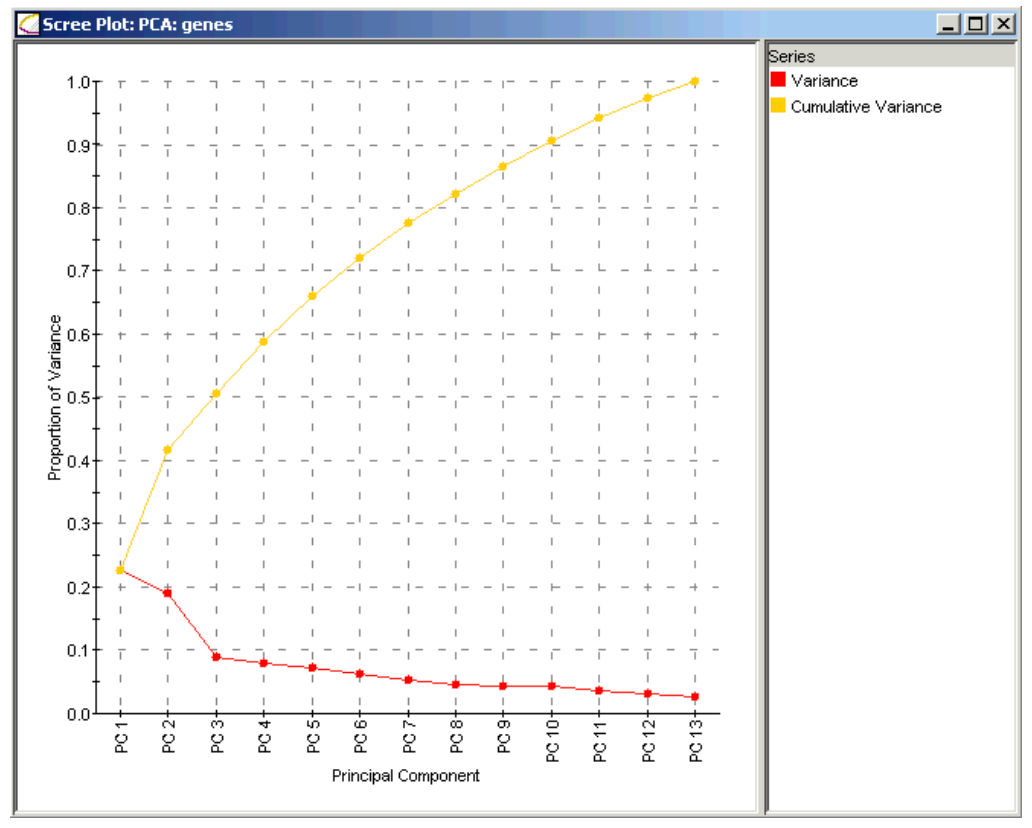

In [9]:
from IPython.display import Image
Image('imagens/pca4.png', width=600, height=500)

A linha vermelha no gráfico acima indica a proporção de variação explicada por cada recurso, que é calculada considerando o autovalor desse componente principal dividido pela soma de todos os autovalores. A proporção de variação explicada pela inclusão apenas do componente principal 1 é representado por: λ₁ / (λ₁ + λ₂ +… + λn), que é de cerca de 23%. A proporção de variação explicada pela inclusão apenas do componente principal 2 é λ / (λ₁ + λ₂ +… + λp), ou cerca de 19%.

A proporção de variação explicada pela inclusão dos componentes principais 1 e 2 é (λ + λ₂) / (λ₁ + λ₂ +… + λn), é de cerca de 42% (variância acumulada). É aqui que entra a linha amarela. A linha amarela indica a proporção acumulada de variação explicada se você incluiu todos os componentes principais até esse ponto. Por exemplo, o ponto amarelo acima de PC2 indica que a inclusão dos principais componentes 1 e 2 explicará cerca de 42% da variação total no modelo.

#### Por Que o PCA Funciona? Autovalores (Eigenvalues) e Autovetores (Eigenvectors)

Uma forma automática de detectar associações multicolineares (e descobrir problemas numéricos em uma inversão de matriz) é usar autovetores. Explicados em termos simples, os autovetores são uma maneira muito inteligente de recombinar a variância entre as variáveis, criando novos recursos acumulando toda a variância compartilhada. Tal recombinação pode ser obtida usando a função NumPy linalg.eig, resultando em um vetor de autovalores (representando a quantidade de variância recombinada para cada nova variável) e autovetores (uma matriz nos dizendo como as novas variáveis se relacionam com as antigas).

Na álgebra linear, um autovetor ou vetor característico de uma transformação linear é um vetor diferente de zero que muda no máximo por um fator escalar quando essa transformação linear é aplicada a ele.

Existe uma correspondência direta entre matrizes quadradas n por n e transformações lineares de um espaço vetorial n-dimensional em si mesmo, dada qualquer base do espaço vetorial. Por esse motivo, em um espaço vetorial de dimensão finita, é equivalente a definir autovalores e autovetores usando a linguagem das matrizes ou a linguagem das transformações lineares. 

Geometricamente, um autovetor correspondente a um autovalor real diferente de zero, aponta para uma direção em que é inclinado pela transformação e o autovalor é o fator pelo qual é inclinado. Se o autovalor for negativo, a direção será invertida. Falando livremente, em um espaço vetorial multidimensional, o autovetor não é rotacionado. No entanto, em um espaço vetorial unidimensional, o conceito de rotação não tem sentido.

Depois de extrair os autovalores, imprimimos em ordem decrescente e procuramos qualquer elemento cujo valor seja próximo de zero ou pequeno em comparação com os outros. Valores próximos a zero podem representar um problema real para equações normais e outros métodos de otimização baseados na inversão matricial. Valores pequenos representam uma fonte elevada, mas não crítica, de multicolinearidade. 

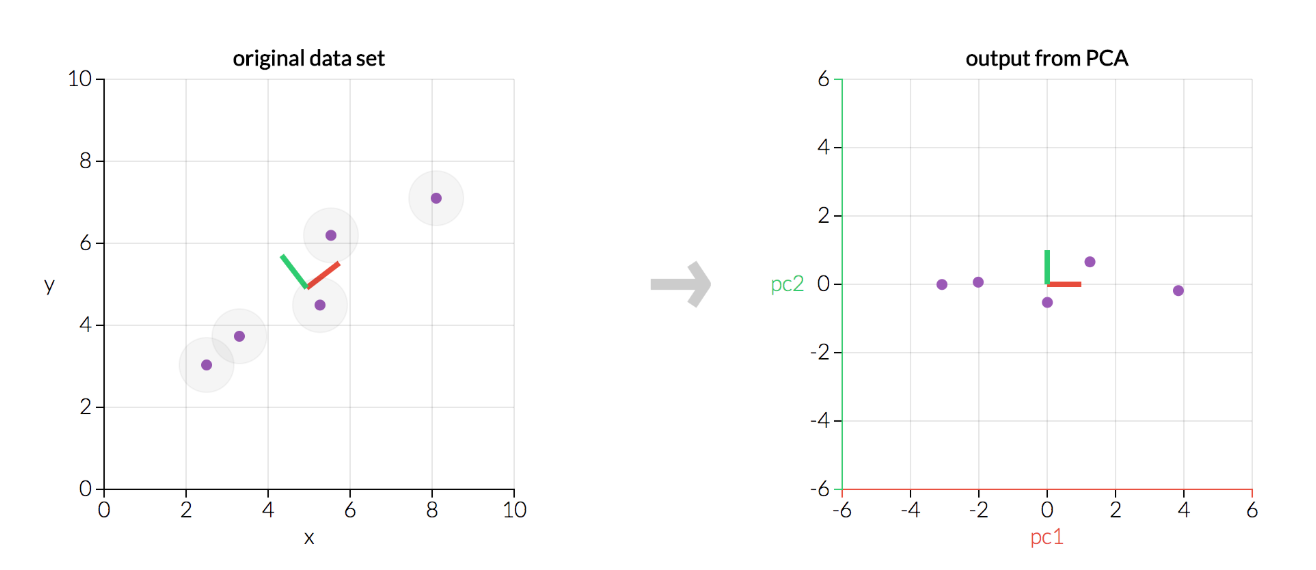

In [10]:
from IPython.display import Image
Image('imagens/pca5.png')

Observe duas coisas nos gráficos acima:

* Os dois gráficos mostram exatamente os mesmos dados, mas o gráfico à direita reflete os dados originais transformados para que nossos eixos agora sejam os componentes principais.


* Todo componente principal SEMPRE será ortogonal (também conhecido como termo matemático oficial para perpendicular) a qualquer outro componente principal.

Como nossos componentes principais são ortogonais entre si, eles são estatisticamente linearmente independentes um do outro ... e é por isso que nossas colunas de Z* são linearmente independentes umas das outras!

#### Por Que o PCA funciona? Interpretação do PCA.

Embora o PCA seja um método muito técnico, baseado em algoritmos de álgebra linear aprofundados, é um método relativamente intuitivo quando você pensa sobre isso.

* Primeiro, a matriz de covariância ZᵀZ é uma matriz que contém estimativas de como cada variável em Z se relaciona com todas as outras variáveis ​​em Z. Compreender como uma variável está associada a outra é bastante poderoso.


* Segundo, autovalores e autovetores são importantes. Os autovetores representam direções. Pense em plotar seus dados em um gráfico de dispersão multidimensional. Então, pode-se pensar em um autovetor como uma “direção” específica em seu gráfico de dispersão de dados. Os autovalores representam magnitude ou importância. Autovalores maiores se correlacionam com direções mais importantes.


* Finalmente, assumimos que mais variabilidade em uma direção específica se correlaciona com a explicação do comportamento da variável dependente. Muita variabilidade geralmente indica sinal, enquanto pouca variabilidade geralmente indica ruído. Assim, quanto maior a variabilidade em uma direção específica, teoricamente, é indicativo de algo importante que queremos detectar.

Assim, o PCA é um método que reúne:

* Uma medida de como cada variável está associada uma à outra (Matriz de covariância).
* As direções nas quais nossos dados estão dispersos (Autovetores).
* A importância relativa dessas diferentes direções (Autovalores).
* O PCA combina nossos preditores e nos permite eliminar os autovetores que são relativamente sem importância.

Isso é o PCA. :-)

## Construindo o Algloritmo PCA em Python

Nosso trabalho aqui será reduzir a dimensionalidade de um dataset que contém as respostas de 40 alunos a um quiz com 49 perguntas. Cada resposta representa uma variável em nosso problema. Os dados são fictícios e de exemplo.

A primeira coluna (que carregaremos como índice) representa ID anônimo do aluno.

In [11]:
# Importando o dataset
df_dsa = pd.read_csv("dataset.csv", index_col=0)

In [12]:
df_dsa.shape

(40, 49)

In [13]:
df_dsa.head()

,186,295,321,337,464,469,502,506,563,931,...,1401,1402,1414,1422,1524,1551,1553,1559,1561,1568
NSCLC_A549_1,171210.5829,1246686.524,527193.4870,411155.8781,59929.70461,49255.07973,171273.1364,159183.1286,663694.9741,35070.49713,...,95049.95991,1.719464e+06,645473.1920,89954.00002,52983.82193,1.672322e+06,6.867305e+05,259889.4715,1.563879e+06,189971.51110
NSCLC_H1703_2,204751.3591,1338013.461,571379.0841,486137.0920,89261.66256,72052.72202,187464.2389,180000.6140,443440.3745,89938.26439,...,131002.12740,8.290090e+05,293504.7109,42264.73772,97472.88420,1.608167e+06,9.408252e+05,363398.5823,3.043114e+05,35762.79339
NSCLC_H1703_1,203558.4952,1040438.105,498460.6875,411052.8868,96002.36973,0.00000,193894.4078,179518.9387,736672.9068,107041.34120,...,108827.84800,8.541730e+05,313811.6234,51125.12753,95633.56928,1.931491e+06,1.086556e+06,417606.0810,4.365568e+05,53865.65208
NSCLC_A549_2,245859.2006,1371135.588,153050.9373,495539.7034,81436.65785,85158.56741,0.0000,186757.1440,809830.2341,43565.82607,...,106003.59820,2.037000e+06,762600.1361,116878.29910,58497.52991,2.077164e+06,8.461167e+05,328548.1739,1.824857e+06,243842.05260
NSCLC_H1437_1,214448.1780,1107105.986,524333.5670,484994.8797,92368.82235,69868.54980,181168.8533,0.0000,635990.2172,51087.42828,...,83218.09256,1.269266e+06,459612.8875,64837.50435,0.00000,9.434720e+05,4.022300e+05,153070.9443,3.745915e+05,44104.41364


In [14]:
# Converte a matriz para o formato NumPy
dsa_matrix = df_dsa.to_numpy()

In [15]:
# Shape - linhas x colunas
dsa_matrix.shape

(40, 49)

In [16]:
# Dados
dsa_matrix

array([[ 171210.5829 , 1246686.524  ,  527193.487  , ...,  259889.4715 ,
        1563879.456  ,  189971.5111 ],
       [ 204751.3591 , 1338013.461  ,  571379.0841 , ...,  363398.5823 ,
         304311.3998 ,   35762.79339],
       [ 203558.4952 , 1040438.105  ,  498460.6875 , ...,  417606.081  ,
         436556.8065 ,   53865.65208],
       ...,
       [ 204221.0677 , 1278411.147  ,  566328.7108 , ...,  148904.9146 ,
         708831.1396 ,  121367.7799 ],
       [ 175149.2572 , 1101994.558  ,  175843.386  , ...,  144382.0813 ,
          77809.90877,  287232.319  ],
       [ 225370.32   , 1407596.388  ,       0.     , ...,  115385.9564 ,
          61827.40414,  176777.0753 ]])

## Implementação do Algoritmo PCA - Versão 1

In [17]:
# Função com implementação do algoritmo PCA
def PCA_DSA_V1(input):
    
    # Calculando a média de cada coluna
    mean = np.mean(input, 0)
    
    # Subtraindo a média da matriz de entrada original
    normalised_input = np.subtract(input, mean)
    
    # Calculando a transposta da matriz normalizada
    normalised_input_transpose = np.transpose(normalised_input)
    
    # Número de amostras (linhas)
    num_of_samples = input.shape[0]
    
    # Multiplicando as matrizes e dividindo por "num_of_samples" para obter a matriz de covariância
    cov_mat = (np.dot(normalised_input_transpose, normalised_input)) / (num_of_samples)
    
    # Localizando autovalores and autovetores
    value, vector = np.linalg.eig(np.array(cov_mat))
    
    # Ordenando os autovetores de acordo com os autovalores
    index = value.argsort()[::-1]
    eigen_value = value[index]
    prin_component = vector[:,index]
    
    # Multiplicando matriz de componente principal com a matriz de dados de entrada para obter o PCA
    pca_output = np.dot(normalised_input, prin_component)

    return pca_output, eigen_value, prin_component, cov_mat

In [18]:
# Executando o PCA
pca_out, eigenval_v1, principal_component, cov_matrix = PCA_DSA_V1(dsa_matrix)

In [19]:
# Somando a variância explicada por 10 componentes principais
variancia_explicada_v1 = (eigenval_v1[0] / sum(eigenval_v1)) + \
                         (eigenval_v1[1] / sum(eigenval_v1)) + \
                         (eigenval_v1[2] / sum(eigenval_v1)) + \
                         (eigenval_v1[3] / sum(eigenval_v1)) + \
                         (eigenval_v1[4] / sum(eigenval_v1)) + \
                         (eigenval_v1[5] / sum(eigenval_v1)) + \
                         (eigenval_v1[6] / sum(eigenval_v1)) + \
                         (eigenval_v1[7] / sum(eigenval_v1)) + \
                         (eigenval_v1[8] / sum(eigenval_v1)) + \
                         (eigenval_v1[9] / sum(eigenval_v1)) 

In [20]:
# Convertendo para valor percentual
variancia_explicada_percentual = variancia_explicada_v1 * 100

In [21]:
print("Total de Variância dos Dados Explicada Por 10 Componentes Principais:", variancia_explicada_percentual)

Total de Variância dos Dados Explicada Por 10 Componentes Principais: (95.78350204185794+0j)


In [22]:
# Calculando a variância total
total_variance_v1 = sum(eigenval_v1)

In [23]:
# Calculando a variância explicada por cada componente principal
variance_explained_v1 = [(i / total_variance_v1) for i in eigenval_v1]

In [24]:
# Calculando a variância explicada acumulada
cumulative_variance_explained_v1 = np.cumsum(variance_explained_v1)

In [25]:
# Exibindo a variância explicada por cada um dos 10 primeiros componentes principais
variance_explained_v1[:10]

[(0.4006389994390452+0j),
 (0.14908971340570915+0j),
 (0.12996709872406495+0j),
 (0.09534871230146713+0j),
 (0.06440429234620816+0j),
 (0.03814704235755981+0j),
 (0.028828684990927864+0j),
 (0.022276999290681027+0j),
 (0.01636017045575179+0j),
 (0.012773307107164454+0j)]

In [26]:
# Exibindo a variância acumulada dos 10 primeiros componentes principais
cumulative_variance_explained_v1[:10]

array([0.400639  +0.j, 0.54972871+0.j, 0.67969581+0.j, 0.77504452+0.j,
       0.83944882+0.j, 0.87759586+0.j, 0.90642454+0.j, 0.92870154+0.j,
       0.94506171+0.j, 0.95783502+0.j])

Cerca de 96% da informação (variação) de 49 variáveis está representada em 10 componentes principais. Podemos usar esses 10 componentes para treinar um modelo de Machine Learning, por exemplo.

## Implementação do Algoritmo PCA - Versão 2

In [27]:
# Função com implementação do algoritmo PCA
def PCA_DSA_V2(input_data):
    
    # Calculando a média de cada coluna
    mean = np.mean(input_data, axis=0)
    
    # Subtraindo a média da matriz de entrada original
    normalised_input = input_data - mean
    
    # Calculando a matriz de covariância
    # A divisão é feita por (num_of_samples - 1) para a covariância da amostra
    cov_mat = np.cov(normalised_input, rowvar = False)
    
    # Localizando autovalores e autovetores usando uma função mais adequada para matrizes simétricas
    eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)
    
    # Ordenando os autovetores de acordo com os autovalores em ordem decrescente
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Multiplicando a matriz de componente principal com a matriz de dados de entrada para obter o PCA
    pca_output = np.dot(normalised_input, sorted_eigenvectors)

    return pca_output, sorted_eigenvalues, sorted_eigenvectors, cov_mat

In [28]:
# Executando o PCA
pca_out, eigenval_v2, principal_component, cov_matrix = PCA_DSA_V2(dsa_matrix)

In [29]:
# Calculando a variância total
total_variance_v2 = sum(eigenval_v2)

In [30]:
# Calculando a variância explicada por cada componente principal
variance_explained_v2 = [(i / total_variance_v2) for i in eigenval_v2]

In [31]:
# Calculando a variância explicada acumulada
cumulative_variance_explained_v2 = np.cumsum(variance_explained_v2)

In [32]:
# Exibindo a variância explicada por cada um dos 10 primeiros componentes principais
variance_explained_v2[:10]

[0.4006389994390449,
 0.1490897134057091,
 0.12996709872406506,
 0.0953487123014669,
 0.0644042923462081,
 0.038147042357559856,
 0.028828684990927923,
 0.022276999290681013,
 0.01636017045575177,
 0.012773307107164435]

In [33]:
# Exibindo a variância acumulada dos 10 primeiros componentes principais
cumulative_variance_explained_v2[:10]

array([0.400639  , 0.54972871, 0.67969581, 0.77504452, 0.83944882,
       0.87759586, 0.90642454, 0.92870154, 0.94506171, 0.95783502])

## Implementação do Algoritmo PCA - Versão 3

In [34]:
import sklearn
from sklearn.decomposition import PCA

In [35]:
# Aplicando PCA
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(dsa_matrix)

In [36]:
# Variância explicada por cada componente
variance_explained_v3 = pca.explained_variance_

In [37]:
# Proporção da variância explicada por cada componente
variance_explained_v3_ratio = pca.explained_variance_ratio_

In [38]:
# Variância explicada acumulada
cumulative_variance_v3_ratio = np.cumsum(variance_explained_v3_ratio)

In [39]:
print("Proporção da variância explicada por cada componente:\n\n", variance_explained_v3_ratio)

Proporção da variância explicada por cada componente:

 [0.400639   0.14908971 0.1299671  0.09534871 0.06440429 0.03814704
 0.02882868 0.022277   0.01636017 0.01277331]


In [40]:
print("Variância explicada acumulada:\n\n", cumulative_variance_v3_ratio)

Variância explicada acumulada:

 [0.400639   0.54972871 0.67969581 0.77504452 0.83944882 0.87759586
 0.90642454 0.92870154 0.94506171 0.95783502]


**No fim, tudo se resume a operações com matrizes. :-)**

In [41]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [42]:
#%watermark -v -m

In [43]:
#%watermark --iversions

# Fim